In [1]:
import pandas as pd
import numpy as np
import math
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ggplot import *
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook

%matplotlib notebook

drink = pd.read_csv('data/strongdrink.txt', header = 0, delimiter = ',')
drink.head()

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interf

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## (a)

<IPython.core.display.Javascript object>


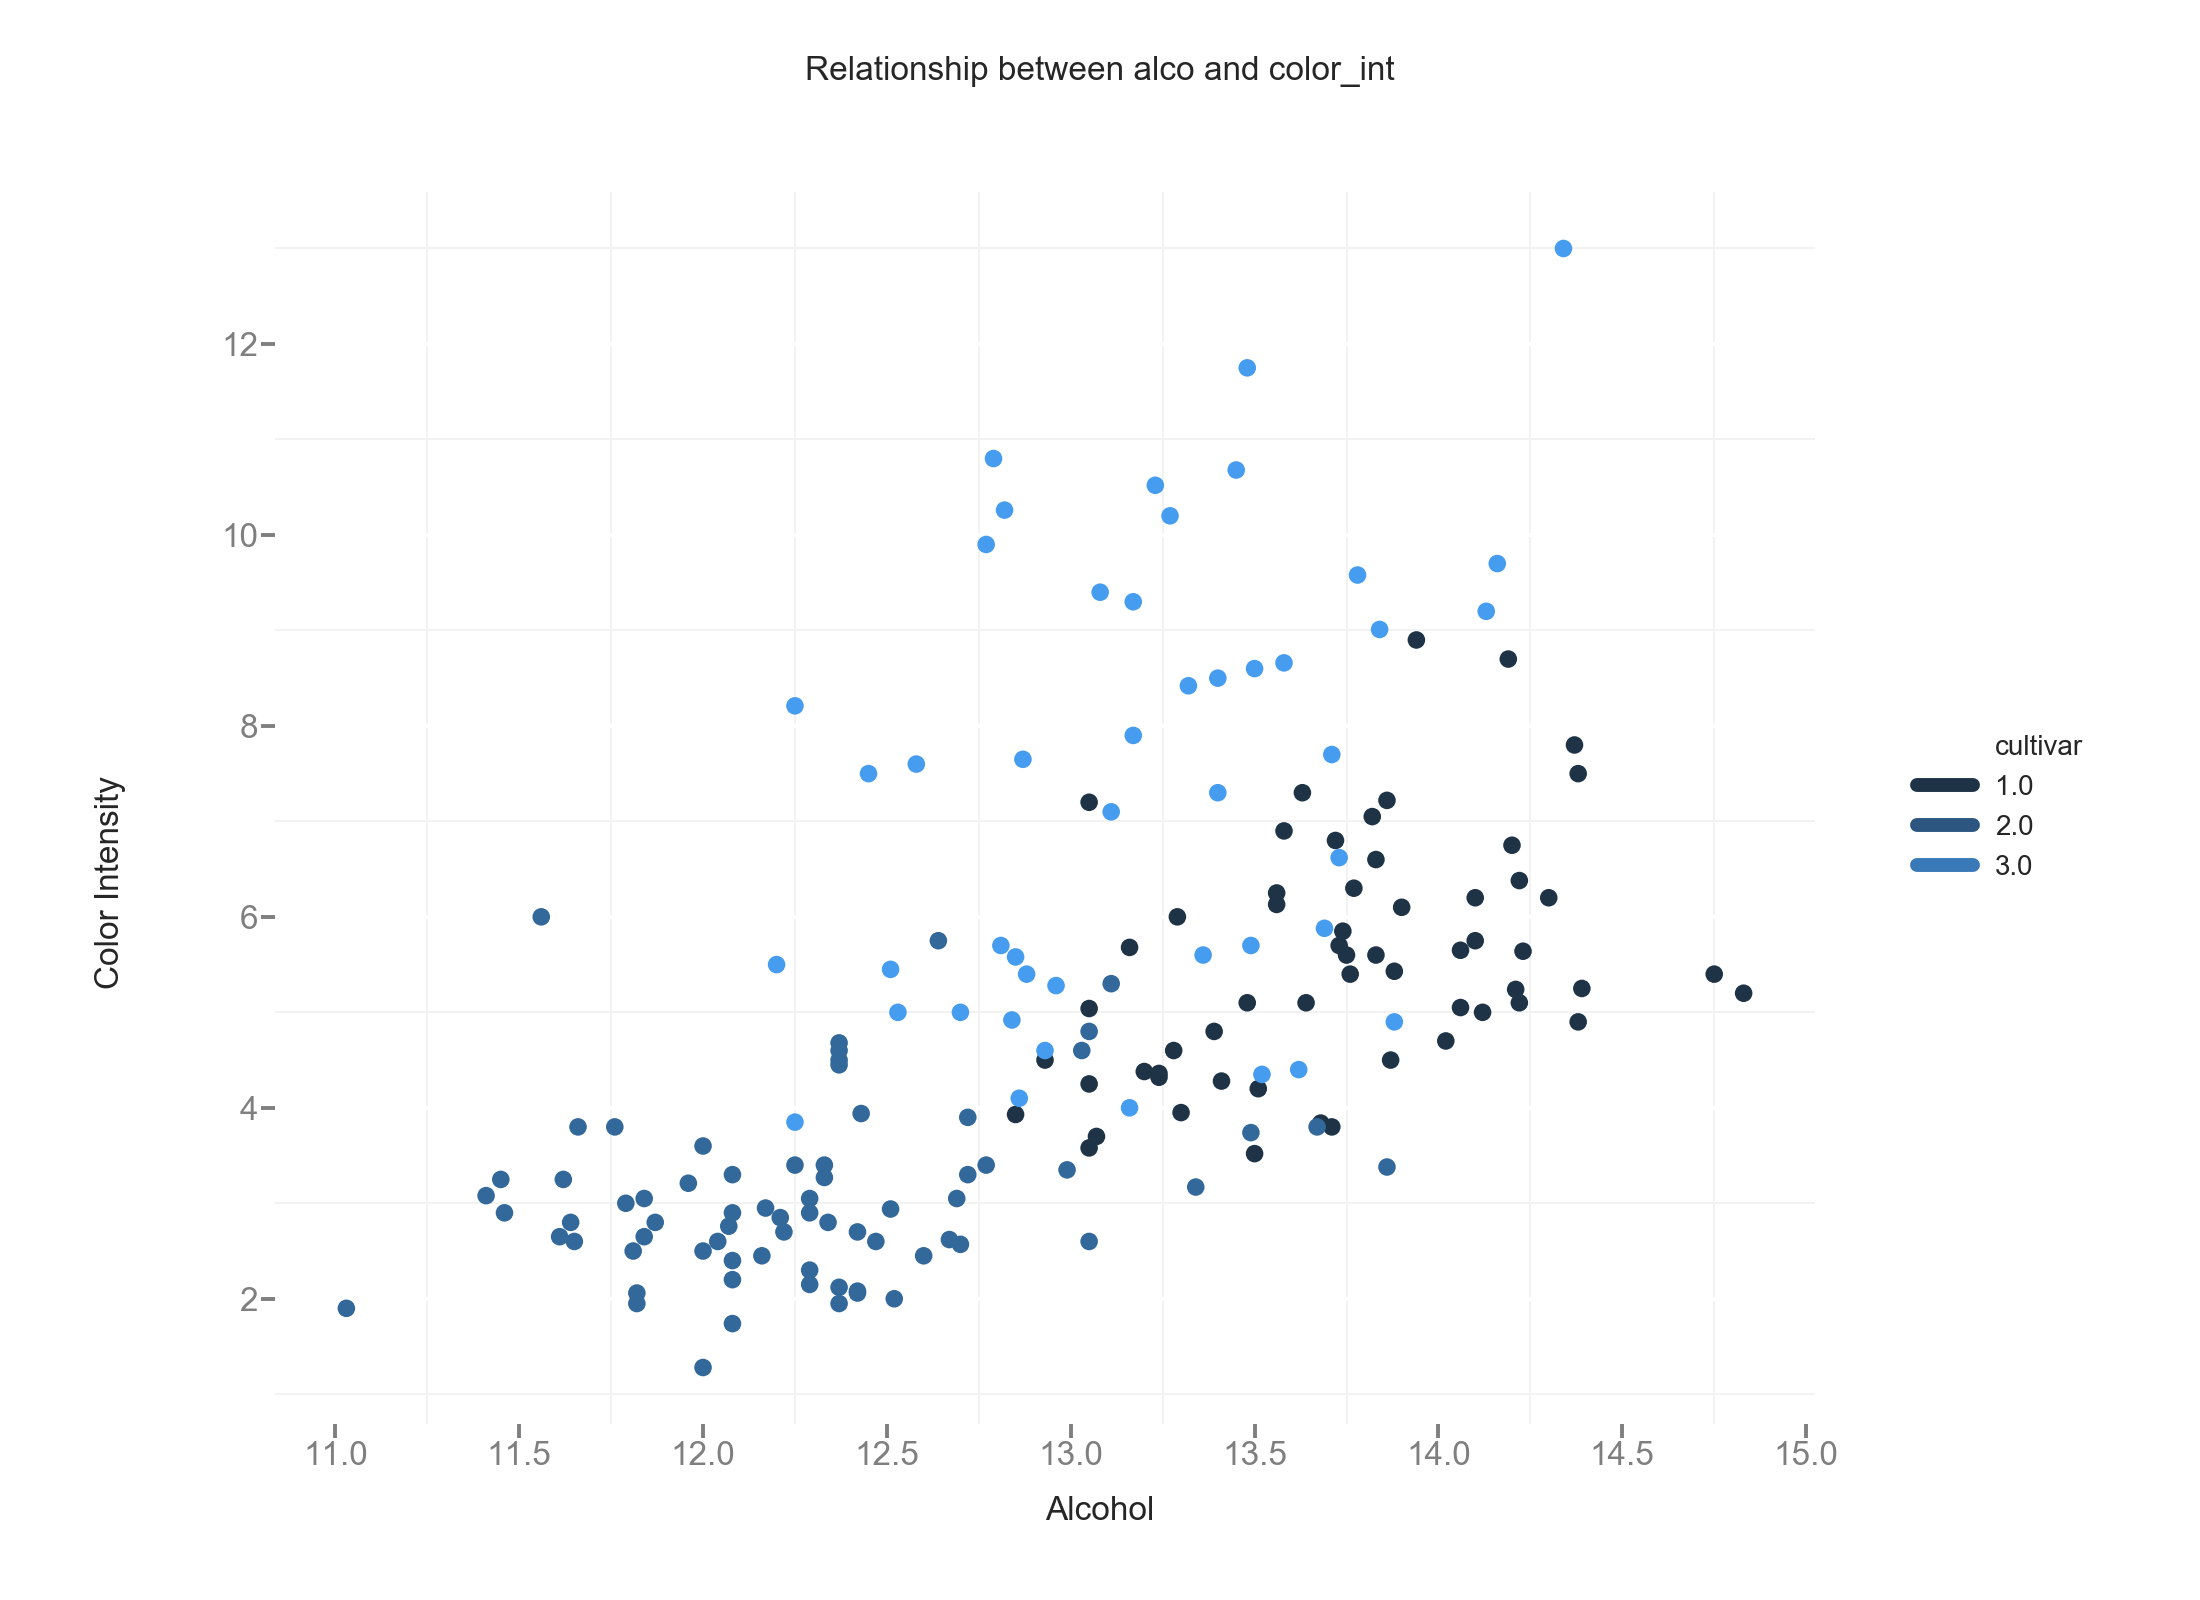

<ggplot: (-9223372036566785087)>

In [29]:
#drink.isnull().sum
ggplot(aes(x='alco', y='color_int', color = 'cultivar'), data=drink) +\
    geom_point(size = 40) +\
    theme_bw() +\
    labs(title = "Relationship between alco and color_int",
         x = "Alcohol",
         y = "Color Intensity")

## (b)

In [2]:
X = drink[['alco', 'malic', 'tot_phen', 'color_int']]
Xvars = X.values
y = drink['cultivar']
yvals = y.values
from sklearn.model_selection import KFold

k = 4
clf_mlog = KFold(n_splits=k, random_state=22, shuffle=True)
clf_mlog.get_n_splits(Xvars)

MSE_vec_clf1 = np.zeros(k)
MSE_vec_clf2 = np.zeros(k)

c_vec = np.zeros(100)
MSE_c_vec = np.zeros(100)
k_ind = int(0)

In [3]:
for c in range(100):
    k_ind = int(0)
    for train_index, test_index in clf_mlog.split(Xvars):
    # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = Xvars[train_index], Xvars[test_index]
        y_train, y_test = yvals[train_index], yvals[test_index]
        LogReg = LogisticRegression(multi_class='multinomial', fit_intercept = True, 
                                solver='newton-cg', C = (c/100 + 0.01))
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        MSE_vec_clf2[k_ind] = (y_test != y_pred).mean()
        k_ind += 1
    c_vec[c] = c/100 + 0.01
    MSE_c_vec[c] =  MSE_vec_clf2.mean()
c_df = pd.DataFrame({'C':c_vec, 'MSE':MSE_c_vec})

In [4]:
c_df.sort_values(['MSE']).head(30)

,C,MSE
36,0.37,0.068182
29,0.30,0.068182
30,0.31,0.068182
31,0.32,0.068182
32,0.33,0.068182
33,0.34,0.068182
34,0.35,0.068182
35,0.36,0.068182
37,0.38,0.068182
38,0.39,0.068182


When multi_class is 'multinomial', 'saga' is the only solver that allows 'l1' penalty. However,if we use 'saga' here, there will be an warning message'coef does not converge', so we should choose 'newton-cg', which only allows 'l2' penalty. Therefore, I vary only the C values, ranging from 0.01 to 1.01, incrementing by 0.01 each time. We can see that MSE is the smallest(0.068182) when C is between (0.28, 0.48), and penalty is 'l2'. 

## (c)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
param_df = pd.DataFrame({"n_estimator" : np.zeros(20),
                         "min_sample_leaf" : np.zeros(20),
                         "max_depth" : np.zeros(20),
                         "MSE" : np.zeros(20)})
tot_df = param_df[:0]

for min_l in range(20):
    for max_d in range(20):
        for tree in range(10):
            drink_tree = RandomForestClassifier(n_estimators = (tree * 20 + 20),
                                        min_samples_leaf = (min_l  + 1),
                                        max_depth = (max_d + 1), bootstrap=True, 
                                        oob_score=True, random_state=22)
            drink_tree.fit(Xvars, yvals)
            param_df["n_estimator"][tree] = (tree * 20 + 20)
            param_df["max_depth"][tree] = (max_d + 1)
            param_df["min_sample_leaf"][tree] = (min_l + 1)
            param_df["MSE"][tree] = 1 - drink_tree.oob_score_
        tot_df = pd.concat([tot_df, param_df])

In [6]:
tot_df = tot_df[(tot_df['MSE'] > 0.00)]
tot_df.sort_values(['MSE']).head(20)

,MSE,max_depth,min_sample_leaf,n_estimator
4,0.056818,16.0,2.0,100.0
4,0.056818,18.0,2.0,100.0
4,0.056818,19.0,2.0,100.0
4,0.056818,10.0,2.0,100.0
4,0.056818,20.0,2.0,100.0
4,0.056818,17.0,2.0,100.0
4,0.056818,9.0,2.0,100.0
4,0.056818,12.0,2.0,100.0
4,0.056818,8.0,2.0,100.0
4,0.056818,7.0,2.0,100.0


We can see that when max_depth is in (5, 20) (inclusive), min_sample_leaf = 2, n_estimator = 100, MSE is the smallest(0.056818). 

## (d)

In [7]:
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
k = 4
clf_svm = KFold(n_splits=k, random_state=22, shuffle=True)
clf_svm.get_n_splits(Xvars)


MSE = np.zeros(k)
param_df2 = pd.DataFrame({"C" : np.zeros(100),
                      "Gamma" : np.zeros(100),
                      "MSE" : np.zeros(100)})
tot_df2 = param_df2[:0]

for g in range(100):
    for c in range(100):
        k_ind = int(0)
        for train_index, test_index in clf_svm.split(Xvars):
            X_train, X_test = Xvars[train_index], Xvars[test_index]
            y_train, y_test = yvals[train_index], yvals[test_index]
            svc = svm.SVC(kernel='rbf', gamma = (g/50 + 0.01),
                          C=c/50 + 0.01)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            MSE[k_ind] = (y_test != y_pred).mean()
            k_ind += 1
        param_df2['C'][c] = c/50 + 0.01
        param_df2['Gamma'][c] = g/50 + 0.01
        param_df2['MSE'][c] =  MSE.mean()
    tot_df2 = pd.concat([tot_df2, param_df2])

In [8]:
tot_df2.sort_values(['MSE']).head(20)

,C,Gamma,MSE
47,0.95,1.67,0.045455
46,0.93,1.67,0.045455
47,0.95,1.65,0.045455
47,0.95,1.61,0.045455
47,0.95,1.63,0.045455
48,0.97,1.71,0.045455
49,0.99,1.69,0.045455
48,0.97,1.69,0.045455
47,0.95,1.69,0.045455
46,0.93,1.69,0.045455


When C = 0.93 or 0.95 and Gamma = 1.67 0r 1.69, or when C = 0.95 and Gamma = 1.61 or 1.63
or 1.65, or when C = 0.97 or 0.99 and Gamma = 1.69 or 1.71, MSE is the smallest. 
min MSE = 0.045455.

## (e)

In [11]:
from sklearn.neural_network import MLPClassifier
k = 4
clf_mlp = KFold(n_splits=k, random_state=22, shuffle=True)
clf_mlp.get_n_splits(Xvars)
MSE = np.zeros(k)
activation = np.array(['identity', 'logistic', 'tanh', 'relu'])
param_df3 = pd.DataFrame({"activation" : np.zeros(10),
                       "hidden_layer" : np.zeros(10),
                       "alpha" : np.zeros(10),
                       "MSE":np.zeros(10)})
tot_df3 = param_df3[:0]

for act in range(4):
    for layer in range(1, 10):
        for a in range(10):
            k_ind = int(0)
            for train_index, test_index in clf_mlp.split(Xvars):
                X_train, X_test = Xvars[train_index], Xvars[test_index]
                y_train, y_test = yvals[train_index], yvals[test_index]
                mlp = MLPClassifier(activation=activation[act], solver='lbfgs',
                                    alpha=(a/50 + 0.001), random_state=22,
                                    hidden_layer_sizes = ((50 * layer)))
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                MSE[k_ind] = (y_test != y_pred).mean()
                k_ind += 1
            param_df3['activation'][a] = activation[act]
            param_df3['hidden_layer'][a] = 50 * layer
            param_df3['alpha'][a] = a/50 + 0.001
            param_df3['MSE'][a] =  MSE.mean()
        tot_df3 = pd.concat([tot_df3, param_df3])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [12]:
tot_df3.sort_values(['MSE']).head(20)

,MSE,activation,alpha,hidden_layer
6,0.034091,relu,0.121,350.0
5,0.039773,relu,0.101,250.0
1,0.039773,relu,0.021,300.0
2,0.039773,relu,0.041,300.0
3,0.039773,relu,0.061,250.0
9,0.045455,relu,0.181,300.0
7,0.045455,relu,0.141,300.0
1,0.045455,relu,0.021,250.0
4,0.045455,tanh,0.081,250.0
4,0.045455,relu,0.081,450.0


When activation = 'relu', alpha = 0.121, and layer = 350, MSE is the smallest(0.034091). 

## (f)

min MSE for LogReg is 0.068182, for random forest classifier is 0.056818, 
for SVM is 0.045455, for MLP Classifier is 0.34091. Therefore, MLP is the best model. 
Below is the comparison for the top models. 

In [13]:
n = 10
lowestmse_logit = np.array(c_df.sort_values(['MSE']).head(n)['MSE'])
lowestmse_RF = np.array(tot_df.sort_values(['MSE']).head(n)['MSE'])
lowestmse_SVM = np.array(tot_df2.sort_values(['MSE']).head(n)['MSE'])
lowestmse_mlp = np.array(tot_df3.sort_values(['MSE']).head(n)['MSE'])
rank = np.array(range(n)) + 1

tot_df4 = pd.DataFrame({'Logit':lowestmse_logit, 
                    'RF':lowestmse_RF,
                    'SVM':lowestmse_SVM,
                    'MLP':lowestmse_mlp,
                    'rank':rank})

<IPython.core.display.Javascript object>


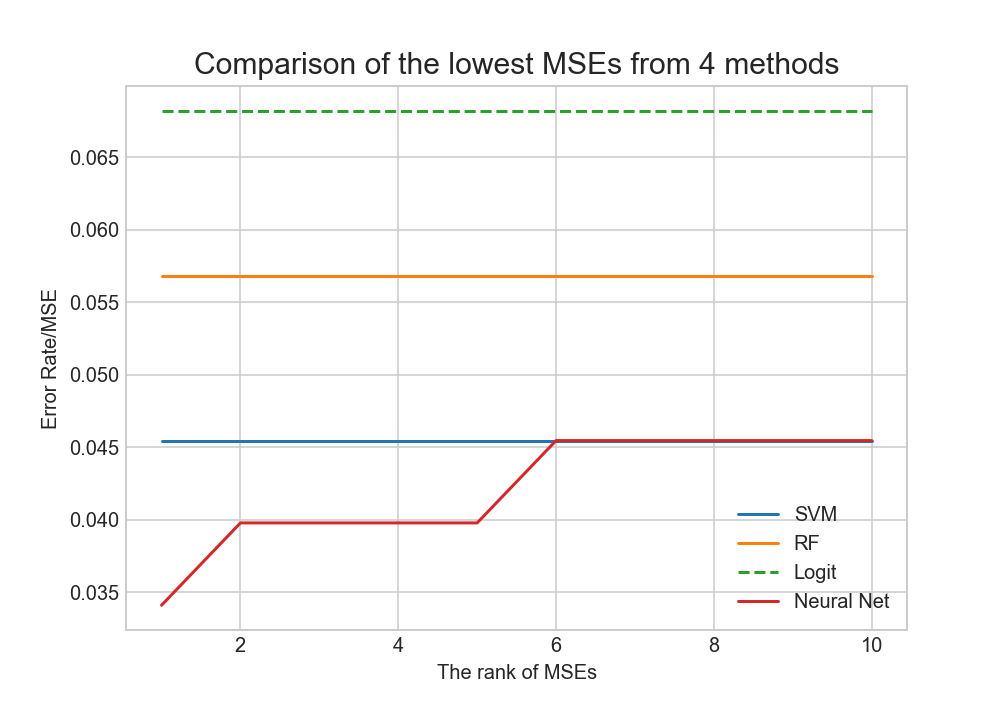

In [14]:
plt.figure(figsize=(7,5))
plt.plot(tot_df4['rank'], tot_df4['SVM'], label='SVM')
plt.plot(tot_df4['rank'], tot_df4['RF'], label='RF')
plt.plot(tot_df4['rank'], tot_df4['Logit'], label='Logit', ls =  'dashed')
plt.plot(tot_df4['rank'], tot_df4['MLP'], label='Neural Net')
plt.legend(loc='best')
plt.title('Comparison of the lowest MSEs from 4 methods', fontsize = 15)
plt.xlabel('The rank of MSEs')
plt.ylabel("Error Rate/MSE")
plt.show()